In [96]:
import virus

In [97]:
Alice = virus.Person()
print(Alice)

x: [86.50735748 74.5821084 ]
v: [ 7.87708981 12.25716402]
a: [0. 0.]
alive: True
infected: False
immune: False
health: 73
bottom: -28



In [98]:
Bob = virus.Person()
print(Bob)

x: [14.54215026 47.50868073]
v: [13.4842686  10.59568144]
a: [0. 0.]
alive: True
infected: False
immune: False
health: 115
bottom: 33



In [99]:
people = virus.CreateWorld(300)


In [100]:
#infect first 10 people
for i in range(10):
    people[i].infected = True

In [101]:

#n iteration
#NITER = 200
#alive = []
#infected = []
#for i in range(NITER):
   # virus.Iterate(people, 100, 100)
  #  ct = 0
   # cu = 0
 #   for me in people:
 #       if me.alive:
 #           ct += 1
 #           if me.infected:
  #              cu += 1
 #   alive.append(ct)
 #   infected.append(cu)

In [102]:
import matplotlib.pyplot as plt
#plt.plot(alive, label = "Alive")
#plt.plot(infected, label="Infected")
#plt.legend()
#plt.show()

In [103]:
#print("Number of people alive at the end of 200 days:", alive[-1]) #-1 if we don't know the last people alive
#print("Maximum number of people infected during simulation:", max(infected))

In [104]:
#print("Mortality rate", (300 - alive[-1])/max(infected))

In [105]:
import numpy as np
NPEOPLE = 300
NITERS = 200
M, B, I = virus.InitVirusMats(NPEOPLE)
B[:10,1] = True #infects first 10 people
inf = np.zeros(NITERS)
aliv = np.zeros(NITERS)
for i in range(NITERS):
    virus.IterateM(M, B, I)
    inf[i] = B[:,1].sum()
    aliv[i] = B[:,0].sum()

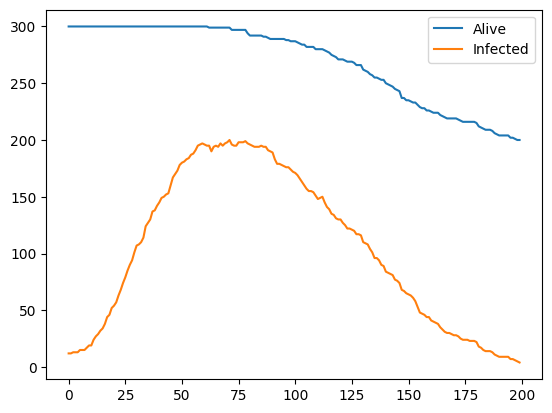

In [106]:
plt.plot(aliv, label = "Alive")
plt.plot(inf, label = "Infected")
plt.legend()
plt.show()

In [107]:
print("max people alive after 200 days:", aliv[-1])
print("max amount of people infected during simulation period", max(inf))
print("Mortality rate", (300 - aliv[-1])/max(inf))

max people alive after 200 days: 200.0
max amount of people infected during simulation period 200.0
Mortality rate 0.5


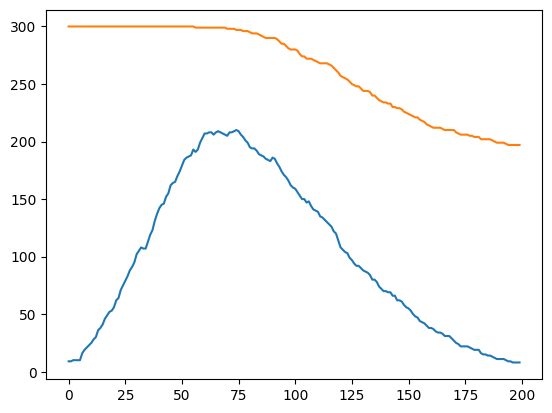

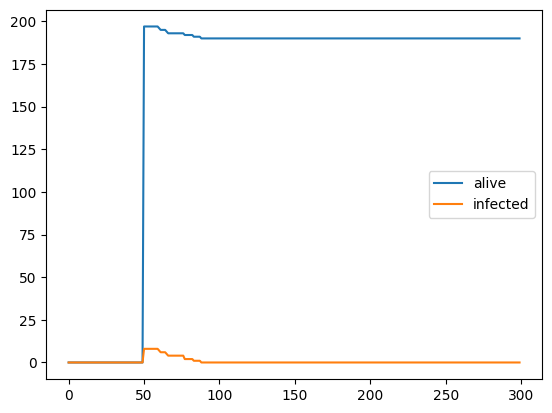

In [116]:
def StayAtHome():
    N_PEOPLE=300
    N_ITERS=300
    M, B, I, _, _ = virus.RunMatrixVirus(N_PEOPLE)
   
    B[:10 ,1] = True
    inf = np.zeros(N_ITERS)
    aliv = np.zeros(N_ITERS)
    
    if B.shape[0] > 0 and len(B) >= 50:
    #stay at home order
        velocities = M[:, 2:4].copy()
        M[:, 2:4] = 0 #set to 0
        
        #running 100 iterations
        for i in range(50,150):
            virus.IterateM(M,B,I)
            inf[i] = B[:,1].sum()
            aliv[i] = B[:,0].sum()
        
        # return values by lifting the order
        M[:, 2:4] = velocities
            
            
        for i in range(150, N_ITERS):
            virus.IterateM(M, B, I)
            inf[i] = B[:, 1].sum()
            aliv[i] = B[:, 0].sum()
            
        plt.plot(aliv, label ="alive")  
        plt.plot(inf, label = "infected")
        
        plt.legend()
        plt.show()
        
StayAtHome()
    